<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

matplotlib.style.use('seaborn')

In [2]:
ref_path = "/content/reference.xlsx"
test_path = "/content/test.xlsx"

df_ref = pd.read_excel(ref_path)
df_test = pd.read_excel(test_path)

In [3]:
df_ref

,partNumber,costingGroup,description,Costing availability,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,form,composition,Buy Weight
0,t0001,MACH_VSB_AL,BEARING FLANGE,Partially costed,28.025379,8.115966,36.141345,plate,aluminium,0.313459
1,t0002,MACH_VSB_AL,SPACER,Partially costed,23.756553,7.565814,31.322367,plate,aluminium,0.198450
2,t0003,MACH_VSB_AL,HINGE,Partially costed,26.584484,7.561053,34.145537,plate,aluminium,0.194657
3,t0004,MACH_VSB_AL,SLIDER,Partially costed,22.939686,7.430709,30.370394,plate,aluminium,0.135755
4,t0005,MACH_SB_AL,PIVOT ARM CTR LH,Partially costed,60.857918,32.989999,93.847917,plate,aluminium,8.858377
...,...,...,...,...,...,...,...,...,...,...
733,t0742,MACH_VSB_AL,OMEGA BRACKET,Costed,21.570329,5.245371,26.815700,plate,aluminium,0.440641
734,t0743,MACH_VSB_AL,DEMAND RAMP BRKT,Costed,22.598740,5.925375,28.524115,plate,aluminium,0.650445
735,t0744,MACH_VSB_AL,SLIDING PLATE,Costed,18.513245,4.796260,23.309505,plate,aluminium,0.246078
736,t0745,MACH_SB_AL,BOOMERANG,Costed,61.414772,46.969911,108.384683,plate,aluminium,15.181368


In [4]:
df_ref.describe()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight
count,738.000000,738.000000,738.000000,738.000000
mean,46.015061,28.797206,74.812267,7.145256
std,28.572274,40.416415,67.467825,13.065372
min,13.701172,2.342822,16.043994,0.083541
25%,29.907924,9.800692,40.373761,0.897450
50%,35.615314,15.229658,50.461993,2.696684
75%,52.798433,31.743483,83.712540,7.910679
max,284.130967,562.446315,846.577283,174.466099


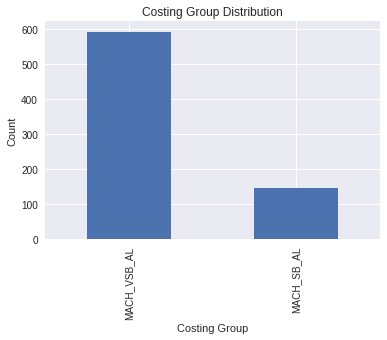

In [5]:
pd.value_counts(df_ref["costingGroup"]).plot.bar()
plt.title("Costing Group Distribution")
plt.xlabel("Costing Group")
plt.ylabel("Count")
plt.show()

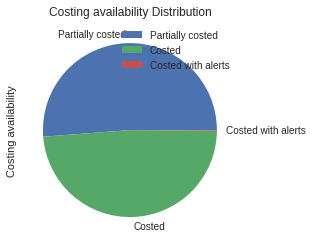

In [6]:
pd.value_counts(df_ref["Costing availability"]).plot.pie()
plt.title("Costing availability Distribution")
plt.legend()
plt.show()

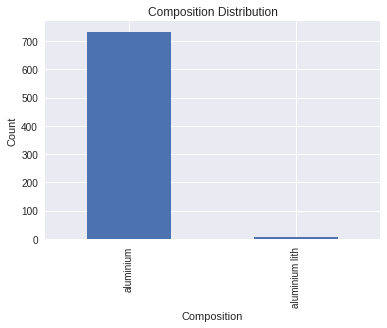

In [7]:
pd.value_counts(df_ref["composition"]).plot.bar()
plt.title("Composition Distribution")
plt.xlabel("Composition")
plt.ylabel("Count")
plt.show()

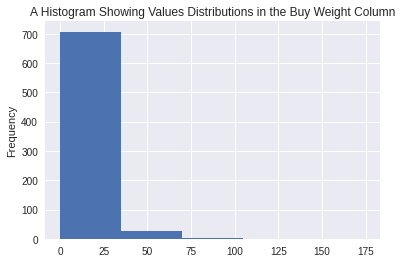

In [8]:
df_ref["Buy Weight"].plot.hist(bins=5)
plt.title("A Histogram Showing Values Distributions in the Buy Weight Column")
plt.show()

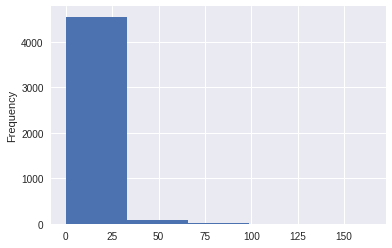

In [9]:
df_test["Buy Weight"].plot.hist(bins=5)
plt.show()

In [10]:
pd.DataFrame(df_ref.isnull().sum())

,0
partNumber,0
costingGroup,0
description,0
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,0


In [11]:
df_ref.describe()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight
count,738.000000,738.000000,738.000000,738.000000
mean,46.015061,28.797206,74.812267,7.145256
std,28.572274,40.416415,67.467825,13.065372
min,13.701172,2.342822,16.043994,0.083541
25%,29.907924,9.800692,40.373761,0.897450
50%,35.615314,15.229658,50.461993,2.696684
75%,52.798433,31.743483,83.712540,7.910679
max,284.130967,562.446315,846.577283,174.466099


In [12]:
df_ref.corr()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight
Total Labor Cost/PN,1.000000,0.910143,0.968713,0.923780
Total Material Cost/PN,0.910143,1.000000,0.984488,0.991406
Total Cost/PN,0.968713,0.984488,1.000000,0.985115
Buy Weight,0.923780,0.991406,0.985115,1.000000


In [13]:
predictors = ["Total Labor Cost/PN", "Total Material Cost/PN", "Total Cost/PN"]
X = df_ref[predictors].values
y = df_ref['Buy Weight'].values

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [15]:
print(X_train.shape)
print(y_train.shape)

(590, 3)
(590,)


In [16]:
model = LinearRegression()
history = model.fit(X_train, y_train)
print("Y-Intercept: {:.4f}, Coefficients: {}".format(history.intercept_, history.coef_))

Y-Intercept: -3.7701, Coefficients: [-3.64876943e+11 -3.64876943e+11  3.64876943e+11]


In [17]:
print("Validation Set")
print("Model's Accuracy: {:.2f}%".format(model.score(X_val, y_val)*100))

y_pred = model.predict(X_val)
print("Mean squared error: %.4f" % mean_squared_error(y_val, y_pred))

Validation Set
Model's Accuracy: 97.53%
Mean squared error: 3.1698


In [18]:
pd.DataFrame(df_test.isnull().sum())

,0
partNumber,0
costingGroup,0
description,1
Costing availability,0
Total Labor Cost/PN,0
Total Material Cost/PN,0
Total Cost/PN,0
form,0
composition,0
Buy Weight,2


In [19]:
df_test.dropna(inplace=True)

In [20]:
df_test.corr()

,Total Labor Cost/PN,Total Material Cost/PN,Total Cost/PN,Buy Weight
Total Labor Cost/PN,1.000000,0.861038,0.940431,0.942839
Total Material Cost/PN,0.861038,1.000000,0.982643,0.914879
Total Cost/PN,0.940431,0.982643,1.000000,0.955575
Buy Weight,0.942839,0.914879,0.955575,1.000000


In [21]:
X_test = df_test[predictors].values
y_test = df_test['Buy Weight'].values

In [22]:
print("Test Set")
print("Model's Accuracy: {:.2f}%".format(model.score(X_test, y_test)*100))

y_pred = model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Test Set
Model's Accuracy: 67.47%
Mean squared error: 34.92


In [23]:
model.coef_

array([-3.64876943e+11, -3.64876943e+11,  3.64876943e+11])

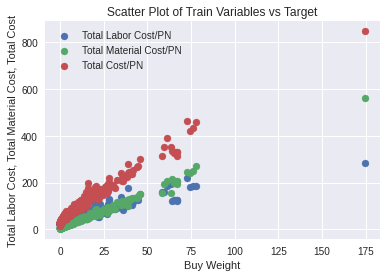

In [24]:
plt.scatter(df_ref["Buy Weight"], df_ref["Total Labor Cost/PN"], label="Total Labor Cost/PN")
plt.scatter(df_ref["Buy Weight"], df_ref["Total Material Cost/PN"], label="Total Material Cost/PN")
plt.scatter(df_ref["Buy Weight"], df_ref["Total Cost/PN"], label="Total Cost/PN")
plt.xlabel("Buy Weight")
plt.ylabel("Total Labor Cost, Total Material Cost, Total Cost")
plt.title("Scatter Plot of Train Variables vs Target")
plt.legend()
plt.show()

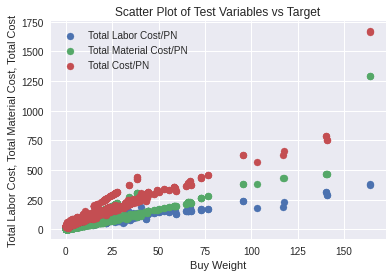

In [25]:
plt.scatter(df_test["Buy Weight"], df_test["Total Labor Cost/PN"], label="Total Labor Cost/PN")
plt.scatter(df_test["Buy Weight"], df_test["Total Material Cost/PN"], label="Total Material Cost/PN")
plt.scatter(df_test["Buy Weight"], df_test["Total Cost/PN"], label="Total Cost/PN")
plt.xlabel("Buy Weight")
plt.ylabel("Total Labor Cost, Total Material Cost, Total Cost")
plt.title("Scatter Plot of Test Variables vs Target")
plt.legend()
plt.show()

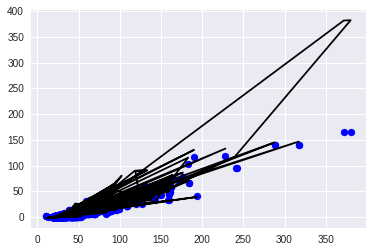

In [26]:
y_pred = model.predict(X_test)
plt.scatter(df_test["Total Labor Cost/PN"], y_test, color ='b')
plt.plot(df_test["Total Labor Cost/PN"], y_pred, color ='k')
  
plt.show()

$Y_i=f(X_i, \beta)+e_i$

$Y_i$	=	dependent variable

$f$	=	function

$X_i$	=	independent variable

$\beta$	=	unknown parameters

$e_i$	=	error terms